### Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.chdir("C:\\Users\\Prakrutdesai.PRAKRUT\\Documents\\Jupyter Notebook\\Nirja\\Midterm")

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'AccutedataProject.ipynb',
 'accute_inflammation.csv',
 'mid_term_project.pdf']

### Data Manipulation 

In [3]:
data = pd.read_csv("accute_inflammation.csv")

In [4]:
data.columns = ['Temp','Nausea','Lumbar','Urine','Micturition','Burning','Inflammation','Nephritis']

In [5]:
data.head()

,Temp,Nausea,Lumbar,Urine,Micturition,Burning,Inflammation,Nephritis
0,35.3,no,yes,no,no,no,no,no
1,35.3,no,no,yes,yes,yes,yes,no
2,35.3,no,yes,no,no,no,no,no
3,36.3,no,no,yes,yes,yes,yes,no
4,36.3,no,yes,no,no,no,no,no


In [6]:
# converting Y/N to 1/0
yn_map = {
    'yes': 1,
    'no': 0
}

data.iloc[:,1:] = data.iloc[:,1:].apply(lambda x: x.map(yn_map))

In [7]:
def defTarget(datapoint):
    if (datapoint.Inflammation==0) & (datapoint.Nephritis==0):
        return 1
    elif (datapoint.Inflammation==0) & (datapoint.Nephritis==1):
        return 2
    elif (datapoint.Inflammation==1) & (datapoint.Nephritis==0):
        return 3
    elif (datapoint.Inflammation==1) & (datapoint.Nephritis==1):
        return 4
    else:
        return -1

In [8]:
data['target'] = data.apply(lambda x: defTarget(x), axis=1)

data.drop(columns=['Inflammation','Nephritis'], inplace=True)

In [9]:
data.target.value_counts()

3    40
2    31
1    30
4    19
Name: target, dtype: int64

In [10]:
data.head()

,Temp,Nausea,Lumbar,Urine,Micturition,Burning,target
0,35.3,0,1,0,0,0,1
1,35.3,0,0,1,1,1,3
2,35.3,0,1,0,0,0,1
3,36.3,0,0,1,1,1,3
4,36.3,0,1,0,0,0,1


### EDA 

##### Continuous Variable: Teprature 

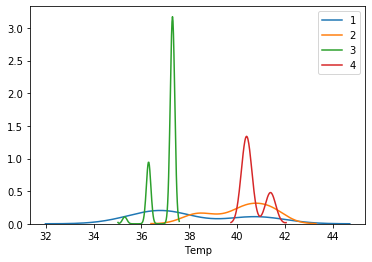

In [11]:
for i in sorted(data.target.unique()):
    temp = data.query("target=={}".format(i))
    sns.distplot(temp['Temp'], label = i, hist = False)
plt.legend()
plt.show()

##### Binary Variables 

In [12]:
bin_vars = list(data.columns[1:-1])
bin_vars

['Nausea', 'Lumbar', 'Urine', 'Micturition', 'Burning']

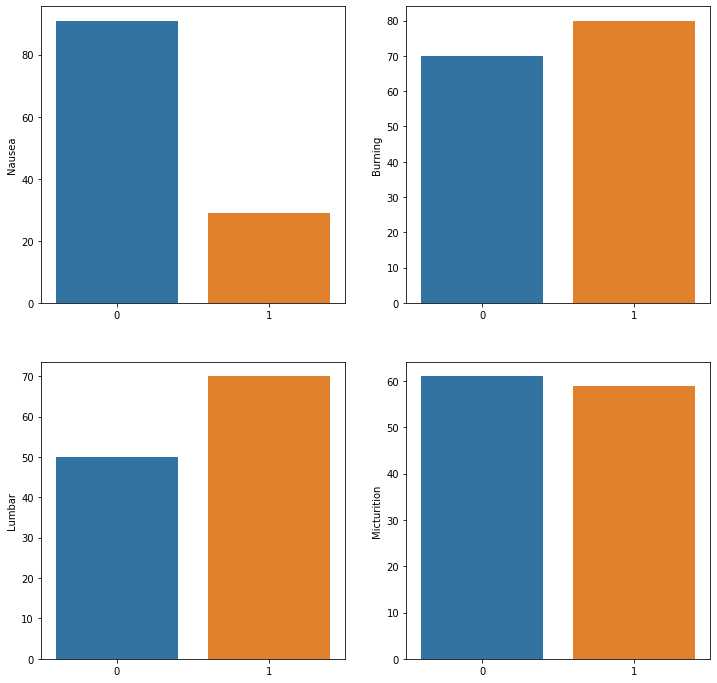

In [13]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i, j in enumerate(bin_vars):
    temp = data[j].value_counts()
    y_ax_index = 0 if i<=1 else 1
    sns.barplot(x = temp.index, y = temp, ax = ax[i%2][0+y_ax_index], label = j)


##### Correlation in Binary Variables 

In [14]:
def getCounts(col1, col2):
    temp = data.pivot_table(index = [col1], columns=[col2],values='Temp',  aggfunc='count').reset_index(drop = True).fillna(0)
    same = temp.iloc[0,0] + temp.iloc[1,1]
    not_same = temp.iloc[1,0] + temp.iloc[0,1]
    return same, not_same

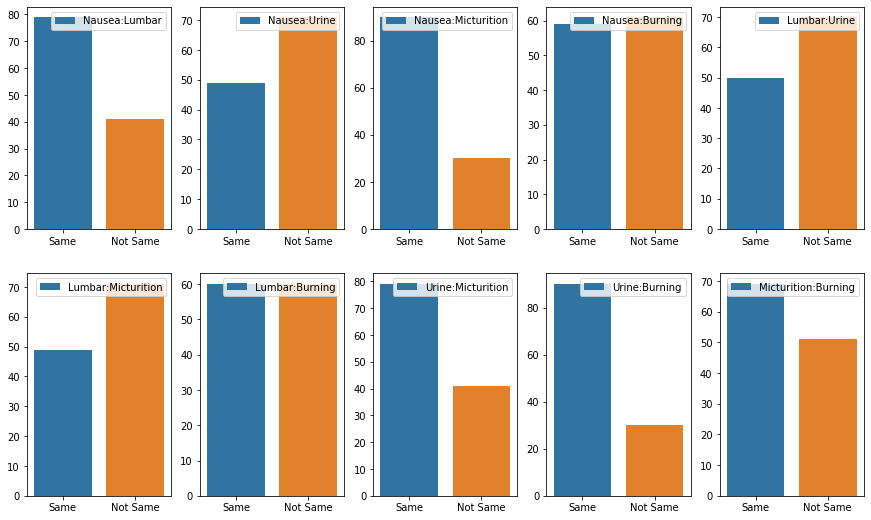

In [15]:
fig, ax = plt.subplots(2,5, figsize = (15,9))
counter = 0
for i, j in enumerate(bin_vars[:-1]):
    for k in bin_vars[i+1:]:
        sns.barplot(x=['Same','Not Same'], y=getCounts(j,k), label = "{}:{}".format(j,k), ax = ax[counter//5][counter%5])
        ax[counter//5][counter%5].legend()
        counter += 1
